<a href="https://colab.research.google.com/github/khalishekahmad/teachingMLDL/blob/deep-learning/Deep_Learning_Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Template Pengerjaan Deep Learning menggunakan PyTorch and TensorFlow (Week 1)

# Persiapan: Pemuatan dan Preprocessing Data

## 1. Menginstal atau Memastikan Instalasi PyTorch, Tensorflow dan Modul Pendukung Seperti NumPy dan Pandas

In [1]:
%pip install pandas numpy matplotlib scikit-learn torch tensorflow

Note: you may need to restart the kernel to use updated packages.


## 2. Mengimpor Library yang Dibutuhkan

In [ ]:
import pandas as pd # untuk membaca data dari file csv
import numpy as np # untuk operasi matematika
from sklearn.model_selection import train_test_split # untuk membagi data menjadi data latih dan data uji
from sklearn.preprocessing import LabelEncoder # untuk mengubah label kelas menjadi angka
import matplotlib.pyplot as plt # untuk membuat plot

## 3. Memuat Dataset ke Dalam Program

In [4]:
data = pd.read_csv('./Infrared.csv').dropna() # membaca data dari file csv
data.sample(10) # menampilkan 10 baris data secara acak

,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,...,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralM
347,Male,18-20,Black or African-American,22.1,26.2,0.64,0.8850,35.4425,35.2525,35.0675,...,34.3675,34.1925,34.1625,34.1200,34.7450,34.5750,35.6700,35.1575,35.1725,36.59
284,Female,21-25,Asian,24.0,35.6,0.72,0.8175,35.8225,35.6350,35.5525,...,35.2600,35.0900,35.1300,35.2700,35.9225,35.7500,36.3925,36.3650,36.3925,37.29
130,Male,18-20,White,23.8,13.8,0.64,1.1875,35.7075,35.9650,35.3050,...,34.5625,34.8975,34.9175,35.0075,35.5625,35.2000,36.1350,36.0275,36.0800,37.39
436,Female,18-20,White,27.8,32.6,0.60,1.5950,36.0125,36.1075,35.3625,...,35.0225,34.7350,34.9925,34.2300,35.3800,35.3725,36.5725,36.3050,36.3500,37.19
600,Female,26-30,White,23.7,16.0,0.60,0.8650,35.2375,35.1575,34.8875,...,34.1275,34.1725,33.8950,34.2300,34.6100,34.4700,36.0225,36.0025,36.0225,37.04
379,Female,31-40,Hispanic/Latino,21.0,57.9,0.71,0.5725,34.8750,35.2125,33.8700,...,34.1225,34.2200,33.9125,34.1650,34.9225,34.6425,35.8250,35.7300,35.7550,36.94
751,Male,18-20,White,24.1,28.4,0.65,1.1800,36.8850,36.9925,36.4800,...,35.8425,35.8525,35.8425,35.7025,36.1475,36.0400,37.0575,36.7800,36.8000,38.49
810,Female,21-25,White,24.5,31.8,0.70,1.1575,36.2725,36.1125,35.6475,...,34.6900,34.6025,34.6475,34.7550,35.8675,35.3100,36.5200,36.4825,36.5075,37.54
331,Female,18-20,White,23.2,47.3,0.61,0.7625,35.8200,35.5475,34.9750,...,34.8175,34.2400,34.1650,34.6750,35.2825,34.8875,36.2850,36.1625,36.1975,37.04
23,Female,18-20,Asian,23.1,22.7,0.80,0.8875,34.9775,35.2000,34.5400,...,34.1850,34.4750,34.0425,34.7950,35.1750,35.0450,35.7750,35.6675,35.7150,36.99


In [9]:
data.describe() # menampilkan statistik data

,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,...,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralM
count,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,...,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000
mean,0.405697,0.817289,3.376228,24.115815,28.749411,0.729784,0.968991,35.596374,35.611651,34.888828,...,34.568583,34.565945,34.488836,34.578310,35.422130,35.094648,36.084615,35.805225,35.837984,37.028163
std,0.491268,1.247225,1.757385,1.337617,13.070900,2.456486,0.362860,0.575436,0.550265,0.719114,...,0.669346,0.678941,0.667293,0.728353,0.523703,0.576283,0.492236,0.559755,0.559812,0.509743
min,0.000000,0.000000,0.000000,20.200000,9.900000,0.540000,-0.590000,33.897500,34.122500,31.770000,...,31.452500,31.657500,31.280000,31.150000,33.407500,32.440000,34.892500,33.802500,33.835000,35.540000
25%,0.000000,0.000000,1.000000,23.400000,17.600000,0.600000,0.772500,35.247500,35.270625,34.457500,...,34.181250,34.178125,34.097500,34.226875,35.118750,34.758125,35.775000,35.473125,35.500000,36.752500
50%,0.000000,0.000000,4.000000,24.000000,26.300000,0.620000,0.940000,35.547500,35.575000,34.915000,...,34.597500,34.602500,34.512917,34.622500,35.392500,35.100000,36.027500,35.788750,35.825000,36.940000
75%,1.000000,1.000000,5.000000,24.700000,36.200000,0.700000,1.140000,35.872500,35.884375,35.300000,...,34.969375,34.965000,34.879375,35.012500,35.675000,35.415000,36.280000,36.087500,36.121875,37.140000
max,1.000000,7.000000,5.000000,29.100000,61.200000,79.000000,2.875000,38.405000,38.042500,37.575000,...,37.075000,37.165000,37.212500,37.367500,38.002500,37.632500,38.807500,38.417500,38.455000,40.340000


## 4. Mengonversi dan Menormalisasi Data

In [10]:
# Mengubah data kategorikal menjadi angka
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender']) # Mengubah label 'Gender' menjadi angka
data['Age'] = label_encoder.fit_transform(data['Age']) # Mengubah label 'Age' menjadi angka
data['Ethnicity'] = label_encoder.fit_transform(data['Ethnicity']) # Mengubah label 'Ethnicity' menjadi angka

# Memisahkan kolom yang digunakan sebagai fitur dan label
X = data.drop("aveOralM", axis=1).values
y = data["aveOralM"].values.reshape(-1, 1)

print(X, y) # menampilkan data fitur dan label

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

[[ 1.      5.      5.     ... 35.6925 35.635  35.6525]
 [ 0.      4.      2.     ... 35.175  35.0925 35.1075]
 [ 0.      2.      5.     ... 35.9125 35.86   35.885 ]
 ...
 [ 0.      0.      2.     ... 36.535  35.965  35.9975]
 [ 1.      3.      3.     ... 35.86   35.415  35.435 ]
 [ 0.      0.      5.     ... 35.9725 35.89   35.9175]] [[36.59]
 [37.19]
 [37.34]
 ...
 [37.59]
 [37.29]
 [37.19]]


## 5. Mempersiapkan Rumus Evaluasi (MSE, RMSE, RSquared)

In [11]:
# Fungsinya untuk menghitung metrik evaluasi
# Metrik evaluasi yang digunakan adalah Mean Squared Error (MSE), Root Mean Squared Error (RMSE), dan R^2
def calculate_metrics(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2) # Mean Squared Error
    rmse = np.sqrt(mse) # Root Mean Squared Error
    ss_res = np.sum((y_true - y_pred) ** 2) # Sum of Squared Residuals (SSR)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2) # Total Sum of Squares (SST)
    r2 = 1 - ss_res / ss_tot # R^2, yaitu 1 - (SSR/SST)\
    
    return mse, rmse, r2

## 6. Membuat Fungsi Visualisasi

In [12]:
# Fungsinya untuk menampilkan plot hasil prediksi
def visualize_results(y_true, y_pred):
    plt.scatter(y_true, y_pred)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs. Predicted')
    plt.show()

# Fungsinya untuk menampilkan plot hasil training
def visualize_training(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# A. Deep Learning dengan PyTorch

## 1. Mengimpor Library yang Dibutuhkan

In [13]:
import torch
import torch.nn as nn # untuk membuat model neural network dengan pytorch
import torch.optim as optim # untuk mengoptimalkan model neural network

## 2. Mengonversi Dataset Menjadi Tipe Tensor PyTorch

In [14]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32) # Mengubah data latih menjadi tensor
y_train_tensor = torch.tensor(y_train, dtype=torch.float32) # Mengubah label data latih menjadi tensor
X_test_tensor = torch.tensor(X_test, dtype=torch.float32) # Mengubah data uji menjadi tensor
y_test_tensor = torch.tensor(y_test, dtype=torch.float32) # Mengubah label data uji menjadi tensor

## 3. Menyusun Model Neural Network Sederhana


In [15]:
# Mendefinisikan model sederhana (Multi-Layer Perceptron)
class SimpleNN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )
    
    def forward(self, x):
        return self.model(x)
    
input_dim = X_train.shape[1] # Jumlah fitur
hidden_dim = 128 # Jumlah neuron pada hidden layer
output_dim = 1 # Jumlah neuron pada output layer

model = SimpleNN(input_dim, hidden_dim, output_dim) # Membuat model

## 4. Menyiapkan Optimizer dan Loss Function

In [ ]:
criterion = nn.MSELoss() # Menggunakan Mean Squared Error sebagai loss function
optimizer = optim.Adam(model.parameters(), lr=0.01) # Menggunakan Adam sebagai optimizer

## 5. Melatih Model

In [ ]:
# Melatih model
num_epochs = 1000 # Jumlah iterasi pelatihan
for epoch in range(num_epochs):
    optimizer.zero_grad() # Mengatur gradien menjadi 0 sebelum melakukan backpropagation
    y_pred = model(X_train_tensor) # Memprediksi data latih
    loss = criterion(y_pred, y_train_tensor) # Menghitung loss
    loss.backward() # Backpropagation
    optimizer.step() # Update bobot
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, loss={loss.item()}')

    # Menyimpan statistik pelatihan untuk menampilkan plot
    if epoch == 0:
        history = pd.DataFrame({'epoch': [epoch], 'loss': [loss.item()]})
    else:
        history = history.append({'epoch': epoch, 'loss': loss.item()}, ignore_index=True)

## 6. Mengevaluasi Model dengan Menghitung MSE, RMSE, dan RSquared

In [ ]:
model.eval() # Mengubah model menjadi mode evaluasi
y_pred = model(X_test_tensor) # Memprediksi data uji

# Menghitung metrik evaluasi
mse, rmse, r2 = calculate_metrics(y_test, y_pred.detach().numpy())
print(f'MSE: {mse}, RMSE: {rmse}, R^2: {r2}')

## 7. Memvisualisasikan Prediksi dari model yang telah dilatih

In [ ]:
# Menampilkan plot hasil prediksi
visualize_results(y_test, y_pred.detach().numpy())

# Menampilkan plot hasil training
visualize_training(history)

# B. Deep Learning dengan TensorFlow

## 2. Import Library yang Dibutuhkan

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential # untuk membuat model neural network
from tensorflow.keras.layers import Dense, Input, Flatten # untuk menambahkan layer pada model
from tensorflow.keras.optimizers import SGD # untuk mengoptimalkan model neural network
import matplotlib.pyplot as plt # untuk membuat plot

## 3. Penyusunan Model Neural Network


In [ ]:
# Membuat model sederhana (Multi-Layer Perceptron)
model = Sequential([
    Input(shape=(input_dim,)),
    Dense(hidden_dim, activation='relu'),
    Dense(output_dim)
])

## 4. Kompilasi Model

In [ ]:
# Kompilasi model
model.compile(optimizer=SGD(learning_rate=0.01), loss='mean_squared_error')

## 5. Pelatihan Model

In [ ]:
# Melatih model
history = model.fit(X_train, y_train, epochs=1000, verbose=0)

## 6. Evaluasi model dengan menghitung MSE, RMSE, dan RSquared

In [ ]:
# Memprediksi data uji
y_pred = model.predict(X_test)

# Menghitung metrik evaluasi
mse, rmse, r2 = calculate_metrics(y_test, y_pred)
print(f'MSE: {mse}, RMSE: {rmse}, R^2: {r2}')

## 7. Memvisualisasikan Prediksi dari model yang telah dilatih

In [ ]:
# Menampilkan plot hasil prediksi
visualize_results(y_test, y_pred.detach().numpy())

# Menampilkan plot hasil training
visualize_training(history)

# Alternatif Program

PyTorch Epoch [20/100], Loss: 63.3606
PyTorch Epoch [40/100], Loss: 9.6887
PyTorch Epoch [60/100], Loss: 4.0158
PyTorch Epoch [80/100], Loss: 3.8062
PyTorch Epoch [100/100], Loss: 3.5543

----- Evaluasi Model PyTorch -----
MSE       : 3.6579376315944723
RMSE      : 1.9125735624007962
R-squared : -17.388843687660724


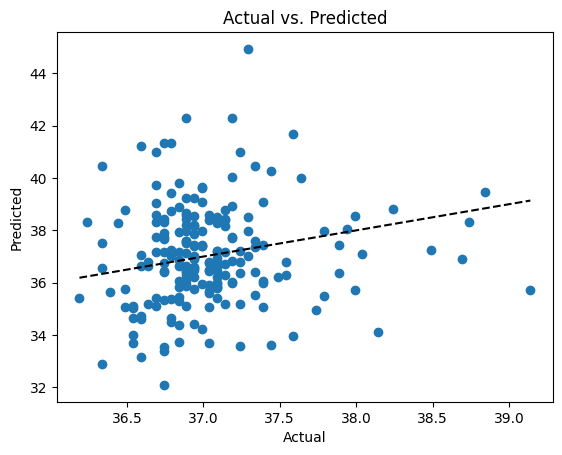

Epoch 1/100


C:\Users\husai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 820us/step - loss: 1414.8365 
Epoch 2/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - loss: 84.0407
Epoch 3/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - loss: 37.3436
Epoch 4/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - loss: 24.1164
Epoch 5/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - loss: 12.5966
Epoch 6/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - loss: 9.2110
Epoch 7/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - loss: 6.0389
Epoch 8/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - loss: 5.3639
Epoch 9/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - loss: 4.5590
Epoch 10/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - loss: 4.5944
Epoch 11/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - loss: 4.4113
Epoch 12/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - loss: 4.1414
Epoch 13/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - loss: 3.6852
Epoch 14/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - loss: 3.8891
Epoch 15/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 867u

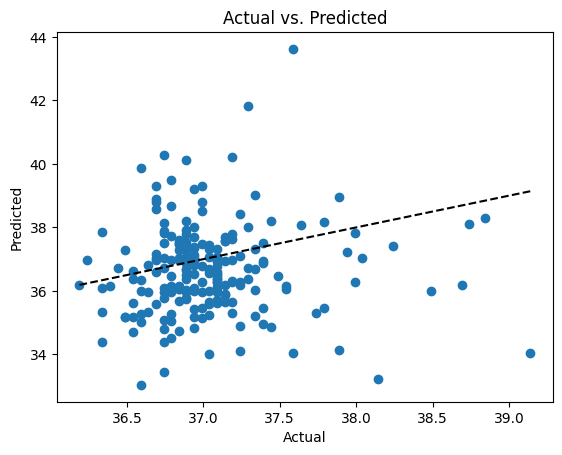

In [ ]:
# Import library yang diperlukan
import pandas as pd
import numpy as np

###############################################
# 1. Load Data dan Preprocessing
###############################################
# Membaca dataset dari file CSV
data = pd.read_csv("Infrared.csv").dropna()

label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender']) # Mengubah label 'Gender' menjadi angka
data['Age'] = label_encoder.fit_transform(data['Age']) # Mengubah label 'Age' menjadi angka
data['Ethnicity'] = label_encoder.fit_transform(data['Ethnicity']) # Mengubah label 'Ethnicity' menjadi angka

# Misalnya, kolom target adalah 'aveOralM'
# Fitur adalah seluruh kolom kecuali 'aveOralM'
X = data[['Gender', 'Age', 'Ethnicity', 'T_atm', 'Humidity', 'Distance','T_offset1']].values
y = data["aveOralM"].values.reshape(-1, 1)

# Membagi data menjadi training dan testing set (misal: 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###############################################
# 2. Evaluasi: Definisi Matriks Evaluasi
###############################################
# Persamaan Evaluasi:
#
# Mean Squared Error (MSE):
#   MSE = (1/n) * Σ (y_i - ŷ_i)^2
#   Penjelasan: Rata-rata kuadrat selisih antara nilai aktual (y_i) dan nilai prediksi (ŷ_i).
#
# Root Mean Squared Error (RMSE):
#   RMSE = sqrt(MSE)
#   Penjelasan: Akar dari MSE yang mengembalikan satuan error ke skala data aslinya.
#
# R-squared (R²):
#   R² = 1 - (SS_res / SS_tot)
#   dengan:
#       SS_res = Σ (y_i - ŷ_i)^2   (Residual Sum of Squares)
#       SS_tot = Σ (y_i - mean(y))^2   (Total Sum of Squares)
#   Penjelasan: Proporsi variasi data yang dijelaskan oleh model. Nilai R² berkisar antara 0 hingga 1.
def calculate_metrics(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    r2 = 1 - ss_res / ss_tot
    return mse, rmse, r2

###############################################
# 3. Model Deep Learning dengan PyTorch
###############################################
import torch
import torch.nn as nn
import torch.optim as optim

# Konversi data training dan testing ke tensor PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Mendefinisikan model sederhana (Multi-Layer Perceptron)
class SimpleMLP(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleMLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )
    
    def forward(self, x):
        return self.model(x)

input_dim = X_train.shape[1]
hidden_dim = 128   # Ukuran hidden layer (bisa disesuaikan)
output_dim = 1    # Karena target berupa satu nilai

model_torch = SimpleMLP(input_dim, hidden_dim, output_dim)

# Definisikan loss function dan optimizer
criterion = nn.MSELoss()  # Menggunakan Mean Squared Error sebagai loss
optimizer = optim.Adam(model_torch.parameters(), lr=0.01)

# Training loop untuk model PyTorch
num_epochs = 100
for epoch in range(num_epochs):
    model_torch.train()
    optimizer.zero_grad()  # Reset gradient
    outputs = model_torch(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()        # Backpropagation
    optimizer.step()       # Update parameter
    
    if (epoch+1) % 20 == 0:
        print(f"PyTorch Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Evaluasi model PyTorch pada testing set
model_torch.eval()
with torch.no_grad():
    y_pred_torch = model_torch(X_test_tensor).detach().numpy()

# Menghitung metrik evaluasi untuk PyTorch
mse_torch, rmse_torch, r2_torch = calculate_metrics(y_test, y_pred_torch)
print("\n----- Evaluasi Model PyTorch -----")
print("MSE       :", mse_torch)
print("RMSE      :", rmse_torch)
print("R-squared :", r2_torch)

visualize_results(y_test, y_pred_torch)

###############################################
# 4. Model Deep Learning dengan TensorFlow (Keras)
###############################################
import tensorflow as tf

# Membangun model Keras sederhana (MLP)
model_tf = tf.keras.models.Sequential([
    tf.keras.layers.Dense(hidden_dim, activation='relu', input_shape=(input_dim,)),
    tf.keras.layers.Dense(1)
])

# Kompilasi model dengan optimizer Adam dan loss MSE
model_tf.compile(optimizer='adam', loss='mse')

# Melatih model TensorFlow
model_tf.fit(X_train, y_train, epochs=num_epochs, batch_size=16, verbose=1)

# Evaluasi model TensorFlow pada testing set
y_pred_tf = model_tf.predict(X_test)

# Menghitung metrik evaluasi untuk TensorFlow
mse_tf, rmse_tf, r2_tf = calculate_metrics(y_test, y_pred_tf)
print("\n----- Evaluasi Model TensorFlow -----")
print("MSE       :", mse_tf)
print("RMSE      :", rmse_tf)
print("R-squared :", r2_tf)

visualize_results(y_test, y_pred_tf)